# Galaxy Dataset 분석 & 모델링
- Decision Tree Modeling
- Dataset 설명
    - samsung 갤럭시 제품 판매 dataset


## STEP1. 모듈 & DATASET 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./galaxy.csv')

## Step 2. EDA 및 데이터 기초 통계 분석

In [3]:
data.shape

(1485, 9)

In [4]:
data.head(3)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [6]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='startprice', ylabel='Density'>

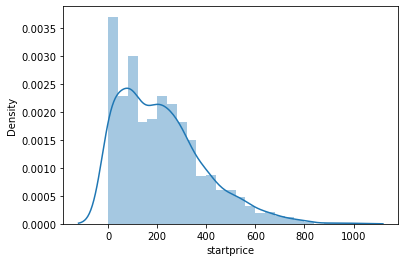

In [7]:
sns.distplot(data['startprice'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charCountDescription', ylabel='Density'>

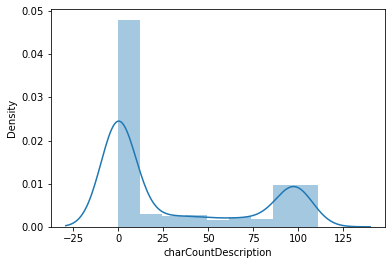

In [8]:
sns.distplot(data['charCountDescription'])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

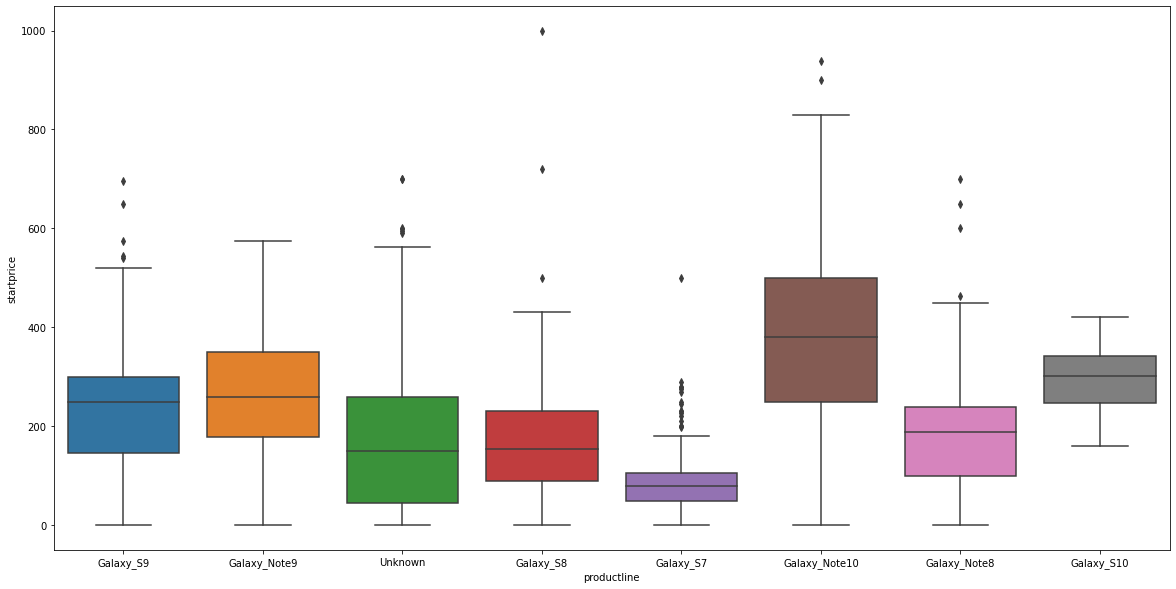

In [10]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='productline', y='startprice', data=data)

## STEP3. Missing value 처리

In [11]:
data.isna().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [12]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [13]:
data = data.fillna('Unknown')

In [14]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [15]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

## STEP4. 카테고리 변수 처리

In [16]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [17]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [18]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [19]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [20]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [21]:
# Black 종류를 하나로 통합
def black(x):
    if x == "Midnight Black":
        return "Black"
    elif x == "Aura Black":
        return "Black"
    elif x == "Prism Black":
        return "Black"
    else:
        return x

In [22]:
def black(x):
    if (x == "Midnight Black") | (x == "Aura Black") | (x == "Prism Black"):
        return "Black"
    else:
        return x

In [23]:
data['color'].apply(lambda x: black(x))

0            White
1          Unknown
2          Unknown
3       Space Gray
4       Space Gray
           ...    
1480       Unknown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [25]:
def black(x):
    if x in ["Midnight Black", "Aura Black", "Prism Black"]:
        return "Black"
    else:
        return x

In [27]:
data['color'] = data['color'].apply(lambda x: black(x))

In [28]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [29]:
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'])

In [30]:
data.head(3)

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


## STEP5. Decision Tree 모델 만들기

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [32]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
model = DecisionTreeClassifier(max_depth=10)

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

## STEP6. 예측 / 검증

In [36]:
pred = model.predict(X_test)

In [37]:
pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int6

In [38]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

## STEP7. 평가

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
accuracy_score(y_test, pred)

0.8013468013468014

## STEP8. 최적의 MaxDepth찾기

In [44]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("max_depth= ",i, " : ", round(accuracy_score(y_test, pred), 3))

max_depth=  2  :  0.818
max_depth=  3  :  0.832
max_depth=  4  :  0.832
max_depth=  5  :  0.825
max_depth=  6  :  0.808
max_depth=  7  :  0.825
max_depth=  8  :  0.811
max_depth=  9  :  0.811
max_depth=  10  :  0.791
max_depth=  11  :  0.808
max_depth=  12  :  0.771
max_depth=  13  :  0.774
max_depth=  14  :  0.781
max_depth=  15  :  0.764
max_depth=  16  :  0.771
max_depth=  17  :  0.751
max_depth=  18  :  0.758
max_depth=  19  :  0.741
max_depth=  20  :  0.761
max_depth=  21  :  0.737
max_depth=  22  :  0.758
max_depth=  23  :  0.758
max_depth=  24  :  0.758
max_depth=  25  :  0.751
max_depth=  26  :  0.758
max_depth=  27  :  0.751
max_depth=  28  :  0.744
max_depth=  29  :  0.744
max_depth=  30  :  0.758


In [47]:
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(round(accuracy_score(y_test, pred), 3))
    print(confusion_matrix(y_test, pred))

0.832
[[151  10]
 [ 40  96]]


## STEP9. Tree Plot

In [49]:
from sklearn.tree import plot_tree

[Text(558.0, 713.475, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 509.625, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 305.775, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 101.92499999999995, '0.43\n230\n[158, 72]'),
 Text(209.25, 101.92499999999995, '0.42\n10\n[3, 7]'),
 Text(418.5, 305.775, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 101.92499999999995, '0.319\n367\n[294, 73]'),
 Text(488.25, 101.92499999999995, '0.038\n52\n[51, 1]'),
 Text(837.0, 509.625, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 305.775, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 101.92499999999995, '0.108\n210\n[12, 198]'),
 Text(767.25, 101.92499999999995, '0.362\n122\n[29, 93]'),
 Text(976.5, 305.775, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(906.75, 101.92499999999995, '0.495\n125\n[69, 56]'),
 Text(1046.25, 101.92499999999995, '0.424\n72\n[22, 50]')]

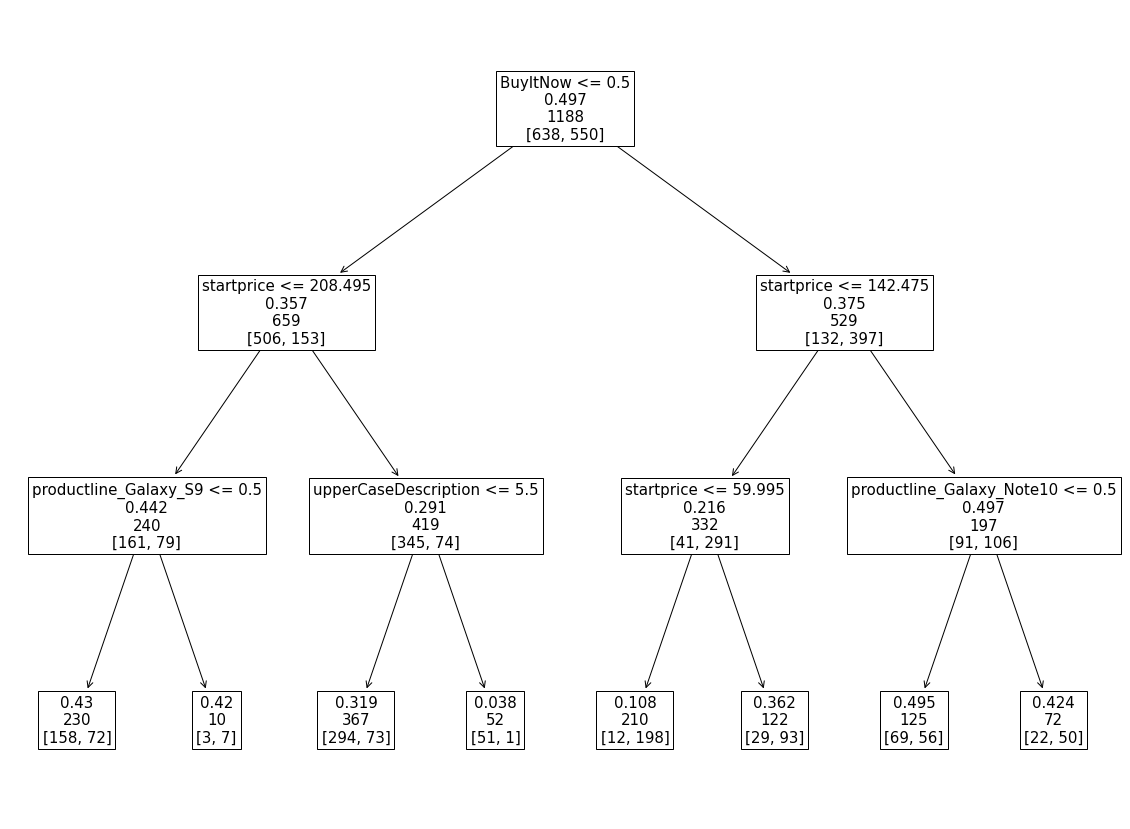

In [50]:
plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label="None")